In [1]:
!pip install PyPDF2 spacy pandas matplotlib -q
!python -m spacy download es_core_news_sm -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 85.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import PyPDF2
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
ruta_pdf = '/content/Manual-de-escritura-jurídica-6-17 (1).pdf'

with open(ruta_pdf, 'rb') as archivo:
    lector = PyPDF2.PdfReader(archivo)
    texto_completo = ""

    # Extraer texto de todas las páginas
    for pagina in lector.pages:
        texto_completo += pagina.extract_text()

print(f"✅ PDF leído correctamente")
print(f"📊 Total de caracteres: {len(texto_completo)}\n")

✅ PDF leído correctamente
📊 Total de caracteres: 68272



In [4]:
print("📝 Primeros 500 caracteres del documento:")
print("-" * 50)
print(texto_completo[:500])
print("-" * 50)
print()

# PASO 4: Contar palabras totales
print("🔢 Contando palabras...")
palabras = texto_completo.split()
total_palabras = len(palabras)
print(f"✅ Total de palabras: {total_palabras}\n")


📝 Primeros 500 caracteres del documento:
--------------------------------------------------
PRIMERA EDICIÓN6 •Introducción
El	tráfico	jurídico	en	Colombia	es	muy	denso.	En	todos	los	campos	de	acción	del	derecho	se	produ -
cen enormes cantidades de documentos, en muchos casos difíciles de entender. Y no precisamen -
te por la complejidad o especialidad de los temas, sino por la forma como están escritos.
Según el Consejo Superior de la Judicatura, en el año 2017 se iniciaron en el país un poco más 
de 2.700.000 procesos judiciales1; entre estos, 102.095 corresponden a demandas contra el
--------------------------------------------------

🔢 Contando palabras...
✅ Total de palabras: 10383



In [5]:
print("🤖 Cargando modelo de procesamiento de lenguaje natural...")
nlp = spacy.load('es_core_news_sm')
doc = nlp(texto_completo.lower())  # Convertir a minúsculas

# PASO 6: Contar palabras sin stop words
print("🔍 Filtrando stop words...")
palabras_sin_stopwords = [token.text for token in doc
                          if not token.is_stop and not token.is_punct and token.is_alpha]
total_sin_stopwords = len(palabras_sin_stopwords)

print(f"✅ Palabras sin stop words: {total_sin_stopwords}")
print(f"📉 Stop words eliminadas: {total_palabras - total_sin_stopwords}\n")


🤖 Cargando modelo de procesamiento de lenguaje natural...
🔍 Filtrando stop words...
✅ Palabras sin stop words: 4816
📉 Stop words eliminadas: 5567



In [6]:
# PASO 7: Identificar entidades nombradas (NER)
print("🏷️  Identificando entidades nombradas (NER)...")
doc_ner = nlp(texto_completo)  # Procesar texto original (con mayúsculas)
entidades = [(ent.text, ent.label_) for ent in doc_ner.ents]

# Contar tipos de entidades
tipos_entidades = Counter([ent[1] for ent in entidades])

print(f"✅ Total de entidades encontradas: {len(entidades)}")
print(f"\n📋 Tipos de entidades:")
for tipo, cantidad in tipos_entidades.items():
    print(f"   - {tipo}: {cantidad}")

🏷️  Identificando entidades nombradas (NER)...
✅ Total de entidades encontradas: 551

📋 Tipos de entidades:
   - MISC: 217
   - PER: 107
   - ORG: 53
   - LOC: 174


In [7]:
print(f"\n🔍 Ejemplos de entidades encontradas (primeras 10):")
for i, (texto, tipo) in enumerate(entidades[:10], 1):
    print(f"   {i}. {texto} → {tipo}")
print()



🔍 Ejemplos de entidades encontradas (primeras 10):
   1. PRIMERA EDICIÓN6 → MISC
   2. Según → PER
   3. Consejo Superior de la Judicatura → ORG
   4. Es -
tado2 → MISC
   5. El número total de escritos → MISC
   6. Jueces → LOC
   7. El volumen de procesos → MISC
   8. Los jueces → MISC
   9. Richard	Wydick → PER
   10. Plain English for Lawyers → MISC



In [8]:
# PASO 8: Crear tabla resumen
print("📊 Creando tabla resumen...")
resumen_data = {
    'Métrica': [
        'Total de palabras',
        'Palabras sin stop words',
        'Stop words eliminadas',
        'Total de entidades (NER)',
        'Tipos de entidades diferentes'
    ],
    'Valor': [
        total_palabras,
        total_sin_stopwords,
        total_palabras - total_sin_stopwords,
        len(entidades),
        len(tipos_entidades)
    ]
}

df_resumen = pd.DataFrame(resumen_data)
print("\n" + "="*50)
print(df_resumen.to_string(index=False))
print("="*50)

📊 Creando tabla resumen...

                      Métrica  Valor
            Total de palabras  10383
      Palabras sin stop words   4816
        Stop words eliminadas   5567
     Total de entidades (NER)    551
Tipos de entidades diferentes      4



📈 Generando visualizaciones...


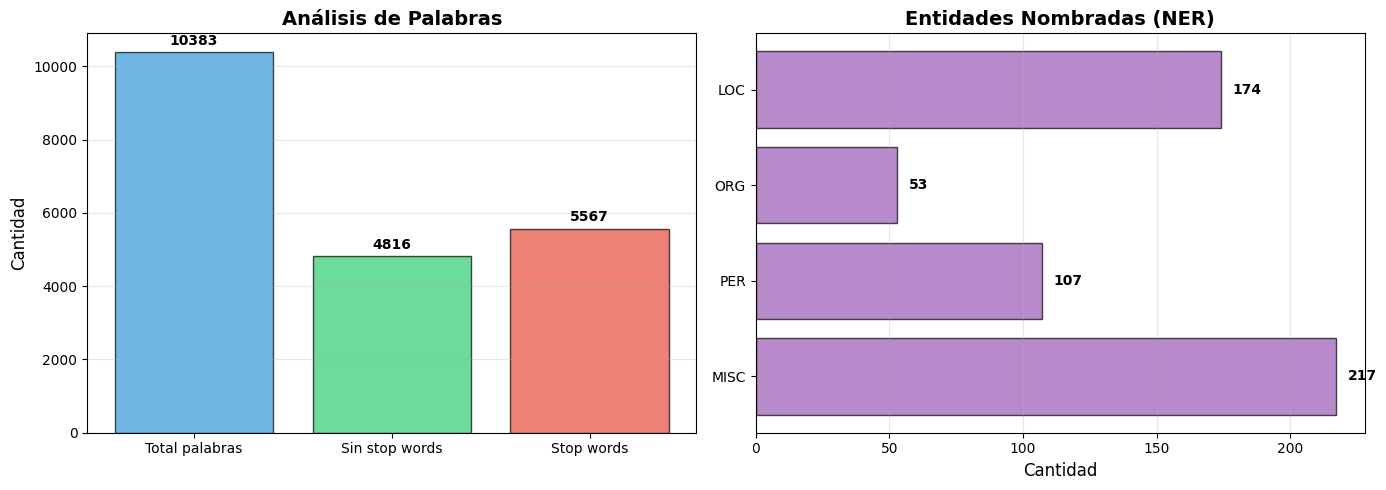


✅ ¡Análisis completado!


In [9]:
print("\n📈 Generando visualizaciones...")

# Crear figura con 2 gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Comparación de palabras
categorias = ['Total palabras', 'Sin stop words', 'Stop words']
valores = [total_palabras, total_sin_stopwords, total_palabras - total_sin_stopwords]
colores = ['#3498db', '#2ecc71', '#e74c3c']

ax1.bar(categorias, valores, color=colores, alpha=0.7, edgecolor='black')
ax1.set_title('Análisis de Palabras', fontsize=14, fontweight='bold')
ax1.set_ylabel('Cantidad', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for i, v in enumerate(valores):
    ax1.text(i, v + max(valores)*0.02, str(v), ha='center', fontweight='bold')

# Gráfico 2: Tipos de entidades
if tipos_entidades:
    tipos = list(tipos_entidades.keys())
    cantidades = list(tipos_entidades.values())

    ax2.barh(tipos, cantidades, color='#9b59b6', alpha=0.7, edgecolor='black')
    ax2.set_title('Entidades Nombradas (NER)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Cantidad', fontsize=12)
    ax2.grid(axis='x', alpha=0.3)

    # Añadir valores en las barras
    for i, v in enumerate(cantidades):
        ax2.text(v + max(cantidades)*0.02, i, str(v), va='center', fontweight='bold')
else:
    ax2.text(0.5, 0.5, 'No se encontraron entidades',
             ha='center', va='center', transform=ax2.transAxes)
    ax2.set_title('Entidades Nombradas (NER)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ ¡Análisis completado!")

In [10]:
# PASO 10: Guardar resultados en Excel
print("\n💾 Guardando resultados en Excel...")

# Crear un archivo Excel con múltiples hojas
with pd.ExcelWriter('analisis_completo.xlsx', engine='openpyxl') as writer:

    # Hoja 1: Resumen general
    df_resumen.to_excel(writer, sheet_name='Resumen', index=False)

    # Hoja 2: Palabras más frecuentes (sin stop words)
    palabras_frecuentes = Counter(palabras_sin_stopwords).most_common(30)
    df_frecuentes = pd.DataFrame(palabras_frecuentes, columns=['Palabra', 'Frecuencia'])
    df_frecuentes.to_excel(writer, sheet_name='Palabras Frecuentes', index=False)

    # Hoja 3: Entidades encontradas
    if entidades:
        df_entidades = pd.DataFrame(entidades, columns=['Entidad', 'Tipo'])
        df_entidades.to_excel(writer, sheet_name='Entidades NER', index=False)

    # Hoja 4: Estadísticas por tipo de entidad
    if tipos_entidades:
        df_tipos = pd.DataFrame(list(tipos_entidades.items()),
                                columns=['Tipo de Entidad', 'Cantidad'])
        df_tipos = df_tipos.sort_values('Cantidad', ascending=False)
        df_tipos.to_excel(writer, sheet_name='Tipos de Entidades', index=False)

    # Hoja 5: Muestra del texto
    df_texto = pd.DataFrame({
        'Primeros 5000 caracteres del documento': [texto_completo[:5000]]
    })
    df_texto.to_excel(writer, sheet_name='Muestra de Texto', index=False)

print("✅ Archivo 'analisis_completo.xlsx' guardado con éxito")
print("\n📊 El Excel contiene las siguientes hojas:")
print("   1. Resumen - Estadísticas generales")
print("   2. Palabras Frecuentes - Top 30 palabras más usadas")
print("   3. Entidades NER - Todas las entidades encontradas")
print("   4. Tipos de Entidades - Resumen por categoría")
print("   5. Muestra de Texto - Primeros 5000 caracteres")

print("\n🎉 ¡Todo listo! Descarga el archivo 'analisis_completo.xlsx'")
print("💡 Tip: En Colab, busca el archivo en la carpeta de archivos (📁) a la izquierda")


💾 Guardando resultados en Excel...
✅ Archivo 'analisis_completo.xlsx' guardado con éxito

📊 El Excel contiene las siguientes hojas:
   1. Resumen - Estadísticas generales
   2. Palabras Frecuentes - Top 30 palabras más usadas
   3. Entidades NER - Todas las entidades encontradas
   4. Tipos de Entidades - Resumen por categoría
   5. Muestra de Texto - Primeros 5000 caracteres

🎉 ¡Todo listo! Descarga el archivo 'analisis_completo.xlsx'
💡 Tip: En Colab, busca el archivo en la carpeta de archivos (📁) a la izquierda
